In [5]:
# !pip install pystan==2.19.1.1
# !pip install prophet

import pandas as pd
from prophet import Prophet

In [38]:
df = pd.read_csv('../data/since-2020.csv')
# df['ds'] = pd.to_datetime(df['Date'] + ' ' + (df['Time'] - 1).astype(str) + ':00')
df.head()

,Date,Time,Stretcher Pts hrly,Stretcher Pts cum,Ambulatory Pts hrly,Ambulatory Pts cum,Total Inflow hrly,Total Inflow cum,Ambulances hrly,Ambulances cum,...,Ambulatory Pts in Vertical,Ambulatory Pts TBS in Vertical,QTrack Patients TBS,GARAGE patient TBS,Consults > 2h in Vertical Except IM,Consult for IM >4h in Vertical,Plain films reqs > 2 hr in Vertical,CTs reqs > 2 hrs in Vertical,Psych Stretcher Pts1pt,Psych pts waiting for admission
0,12/31/21,24,1,101,1,67,2,168,1,31,...,1,1,0.0,0.0,0,0,0,2,3,3
1,12/31/21,23,4,100,0,66,4,166,3,30,...,2,0,0.0,1.0,0,0,0,2,3,3
2,12/31/21,22,6,96,0,66,6,162,1,27,...,3,1,0.0,0.0,1,0,0,4,3,3
3,12/31/21,21,3,90,0,66,3,156,1,26,...,2,2,0.0,2.0,0,0,0,4,3,3
4,12/31/21,20,4,87,4,66,8,153,0,25,...,6,4,0.0,3.0,0,0,0,4,3,3


In [39]:
df = df[df['Time']==24]
df

,Date,Time,Stretcher Pts hrly,Stretcher Pts cum,Ambulatory Pts hrly,Ambulatory Pts cum,Total Inflow hrly,Total Inflow cum,Ambulances hrly,Ambulances cum,...,Ambulatory Pts in Vertical,Ambulatory Pts TBS in Vertical,QTrack Patients TBS,GARAGE patient TBS,Consults > 2h in Vertical Except IM,Consult for IM >4h in Vertical,Plain films reqs > 2 hr in Vertical,CTs reqs > 2 hrs in Vertical,Psych Stretcher Pts1pt,Psych pts waiting for admission
0,12/31/21,24,1,101,1,67,2,168,1,31,...,1,1,0.0,0.0,0,0,0,2,3,3
24,12/31/20,24,5,86,0,107,5,193,3,39,...,2,2,NaN,NaN,0,0,0,1,3,3
48,12/30/21,24,5,137,1,90,6,227,2,37,...,2,2,0.0,3.0,2,0,0,1,3,2
72,12/30/20,24,0,110,0,97,0,207,0,41,...,13,8,NaN,NaN,1,0,2,0,4,2
96,12/29/21,24,5,114,2,91,7,205,1,40,...,0,0,0.0,3.0,0,0,0,1,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17639,01/02/21,24,4,91,1,72,5,163,2,45,...,6,4,NaN,NaN,2,1,1,0,0,0
17663,01/02/20,24,0,169,3,163,3,332,0,47,...,6,5,NaN,NaN,1,0,0,0,3,2
17687,01/01/22,24,3,91,0,70,3,161,0,34,...,2,1,0.0,1.0,2,0,2,0,3,2
17711,01/01/21,24,1,71,2,70,3,141,0,34,...,2,0,NaN,NaN,0,0,0,1,3,1


In [40]:
df['ds'] = pd.to_datetime(df['Date'])
df = df[['ds', 'Total Inflow cum']]
df = df.sort_values(by='ds', ascending=False)
df

,ds,Total Inflow cum
17111,2022-01-09,161
17183,2022-01-08,168
17255,2022-01-07,202
17327,2022-01-06,209
17399,2022-01-05,220
...,...,...
17447,2020-01-05,253
17519,2020-01-04,253
17591,2020-01-03,332
17663,2020-01-02,332


In [42]:
df.columns = ['ds', 'y']
df = df.reset_index(drop=True)
df

,ds,y
0,2022-01-09,161
1,2022-01-08,168
2,2022-01-07,202
3,2022-01-06,209
4,2022-01-05,220
...,...,...
735,2020-01-05,253
736,2020-01-04,253
737,2020-01-03,332
738,2020-01-02,332


In [31]:
m = Prophet()
m.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [33]:
future = m.make_future_dataframe(periods=7)
future.tail(7)

,ds
740,2022-01-10
741,2022-01-11
742,2022-01-12
743,2022-01-13
744,2022-01-14
745,2022-01-15
746,2022-01-16


In [34]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
740,2022-01-10,214.824946,191.729335,239.351280
741,2022-01-11,199.706617,173.604123,222.829958
742,2022-01-12,194.537223,169.994303,219.048173
743,2022-01-13,192.769724,169.960405,216.865370
744,2022-01-14,191.492683,166.816207,216.734381
745,2022-01-15,160.955374,135.392396,185.904980
746,2022-01-16,154.222354,130.792635,177.565887


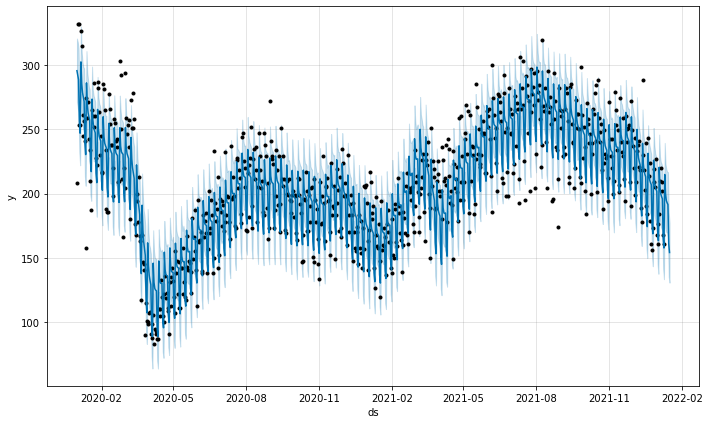

In [35]:
fig1 = m.plot(forecast)

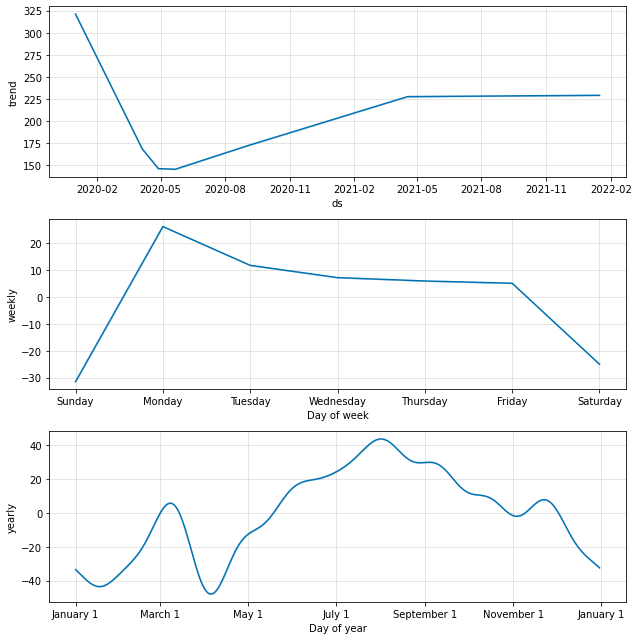

In [36]:
fig2 = m.plot_components(forecast)


In [44]:
df

,ds,y
0,2022-01-09,161
1,2022-01-08,168
2,2022-01-07,202
3,2022-01-06,209
4,2022-01-05,220
...,...,...
735,2020-01-05,253
736,2020-01-04,253
737,2020-01-03,332
738,2020-01-02,332


In [47]:
df.to_csv('../data/jgh-daily-visits.csv', index=False)

In [46]:
df = pd.read_csv('../data/jgh-daily-visits.csv')
df = df.sort_values(by='ds', ascending=False)
df

,ds,y
0,2022-01-09,161
1,2022-01-08,168
2,2022-01-07,202
3,2022-01-06,209
4,2022-01-05,220
...,...,...
744,2012-05-05,180
743,2012-05-04,210
742,2012-05-03,204
741,2012-05-02,201


In [64]:
import pandas as pd

df = pd.read_csv("../data/daily-visits.csv")

df2 = pd.read_csv('../data/recent.csv')
df2 = df2[df2.Time==24]
df2['ds'] = pd.to_datetime(df2['Date'])
df2
# df2['y'] = df2['Total Inflow cum']
# df2 = df2[['ds', 'y']]
# df = pd.concat([df, df2])
# df



,Date,Time,Stretcher Pts hrly,Stretcher Pts cum,Ambulatory Pts hrly,Ambulatory Pts cum,Total Inflow hrly,Total Inflow cum,Ambulances hrly,Ambulances cum,...,Ambulatory Pts TBS in Vertical,QTrack Patients TBS,GARAGE patient TBS,Consults > 2h in Vertical Except IM,Consult for IM >4h in Vertical,Plain films reqs > 2 hr in Vertical,CTs reqs > 2 hrs in Vertical,Psych Stretcher Pts1pt,Psych pts waiting for admission,ds
10,01/09/22,24,5,107,2,54,7,161,2,37,...,3,0,3,0,0,1,0,8,2,2022-01-09
34,01/08/22,24,3,89,1,79,4,168,1,42,...,4,0,2,3,0,1,0,6,1,2022-01-08
58,01/07/22,24,2,110,1,92,3,202,0,36,...,2,0,2,0,0,0,2,4,0,2022-01-07
82,01/06/22,24,3,109,1,100,4,209,1,37,...,7,0,1,1,0,0,1,2,0,2022-01-06
106,01/05/22,24,5,131,2,89,7,220,4,38,...,10,0,4,0,1,0,2,5,3,2022-01-05
130,01/04/22,24,3,112,1,98,4,210,1,32,...,7,0,6,1,0,0,0,4,4,2022-01-04
154,01/03/22,24,2,107,0,77,2,184,2,39,...,3,0,1,2,1,0,1,4,3,2022-01-03
178,01/02/22,24,1,77,0,99,1,176,0,37,...,4,0,2,0,0,0,0,3,0,2022-01-02
202,01/01/22,24,3,91,0,70,3,161,0,34,...,1,0,1,2,0,2,0,3,2,2022-01-01


,Date,Time,Stretcher Pts hrly,Stretcher Pts cum,Ambulatory Pts hrly,Ambulatory Pts cum,Total Inflow hrly,Total Inflow cum,Ambulances hrly,Ambulances cum,...,Ambulatory Pts in Vertical,Ambulatory Pts TBS in Vertical,QTrack Patients TBS,GARAGE patient TBS,Consults > 2h in Vertical Except IM,Consult for IM >4h in Vertical,Plain films reqs > 2 hr in Vertical,CTs reqs > 2 hrs in Vertical,Psych Stretcher Pts1pt,Psych pts waiting for admission
10,01/09/22,24,5,107,2,54,7,161,2,37,...,3,3,0,3,0,0,1,0,8,2
34,01/08/22,24,3,89,1,79,4,168,1,42,...,5,4,0,2,3,0,1,0,6,1
58,01/07/22,24,2,110,1,92,3,202,0,36,...,4,2,0,2,0,0,0,2,4,0
82,01/06/22,24,3,109,1,100,4,209,1,37,...,8,7,0,1,1,0,0,1,2,0
106,01/05/22,24,5,131,2,89,7,220,4,38,...,11,10,0,4,0,1,0,2,5,3
130,01/04/22,24,3,112,1,98,4,210,1,32,...,8,7,0,6,1,0,0,0,4,4
154,01/03/22,24,2,107,0,77,2,184,2,39,...,5,3,0,1,2,1,0,1,4,3
178,01/02/22,24,1,77,0,99,1,176,0,37,...,4,4,0,2,0,0,0,0,3,0
202,01/01/22,24,3,91,0,70,3,161,0,34,...,2,1,0,1,2,0,2,0,3,2
